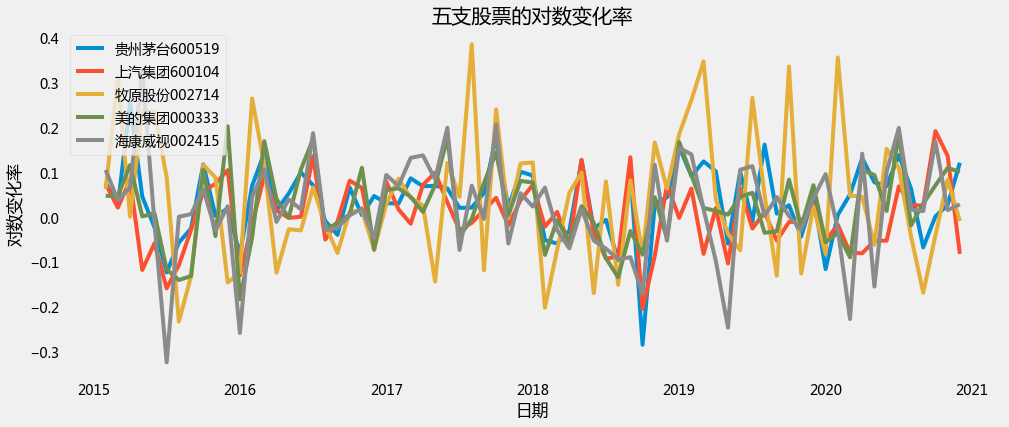

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import date
import matplotlib


def judge_func(file, date):
    # 检查当日是否休市
    try:
        file.loc[date]
        return False
    except:
        return True


def get_lograte(file):
    # 获取时间序列
    date_list = date.get_time_sequence(2015, 2020)
#     print(date_list)

    # 每个月的收盘价
    close_list = []
    for i in date_list:
        day = i
        while(judge_func(file, day)):  # 如果当天休市
            day = date.fix_date(day)  # 往后挪一天继续检测
        close_list.append(file.loc[day]["Close"])  # 返回当天收盘价

# 计算对数收益率
    close_list = pd.Series(close_list)
    log_rate = np.log(close_list/close_list.shift(1))
    return log_rate


# 读入股票数据
file1 = pd.read_csv("./babe/babe/贵州茅台600519.SS.csv", index_col=["Date"])
lograte_1 = get_lograte(file1)
name1 = '贵州茅台600519'

file2 = pd.read_csv("./babe/babe/上汽集团600104.SS.csv", index_col=["Date"])
lograte_2 = get_lograte(file2)
name2 = "上汽集团600104"

file3 = pd.read_csv("./babe/babe/牧原股份002714.SZ.csv", index_col=["Date"])
lograte_3 = get_lograte(file3)
name3 = "牧原股份002714"

file4 = pd.read_csv("./babe/babe/美的集团000333.SZ.csv", index_col=["Date"])
lograte_4 = get_lograte(file4)
name4 = "美的集团000333"

file5 = pd.read_csv("./babe/babe/海康威视002415.SZ.csv", index_col=["Date"])
lograte_5 = get_lograte(file5)
name5 = "海康威视002415"
# 画图部分
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 6))

# 设置中文字体
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] 

plt.xlabel("日期")
plt.ylabel("对数变化率")
plt.title("五支股票的对数变化率")
plt.plot(lograte_1, label=name1)
plt.plot(lograte_2, label=name2)
plt.plot(lograte_3, label=name3)
plt.plot(lograte_4, label=name4)
plt.plot(lograte_5, label=name5)
plt.grid()
plt.legend()
l = [i for i in range(0, 73, 12)]
year = [i for i in range(2015, 2022)]
plt.xticks(l, year)
plt.show()

In [22]:
# 计算收益率
file1['returns'] = (file1['Close'] / file1['Close'].shift(1))-1
file2['returns'] = (file2['Close'] / file2['Close'].shift(1))-1
file3['returns'] = (file3['Close'] / file3['Close'].shift(1))-1
file4['returns'] = (file4['Close'] / file4['Close'].shift(1))-1
file5['returns'] = (file5['Close'] / file5['Close'].shift(1))-1


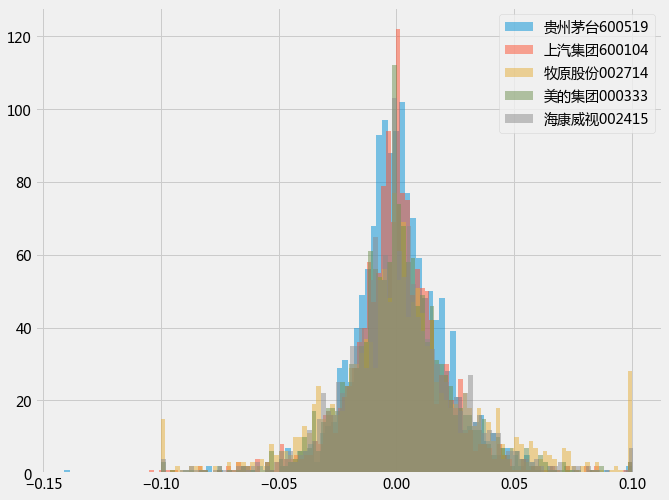

In [23]:
# 画收益率直方图
file1['returns'].hist(bins=100,label=name1,figsize=(10,8),alpha=0.5)
file2['returns'].hist(bins=100,label=name2,alpha=0.5)
file3['returns'].hist(bins=100,label=name3,alpha=0.5)
file4['returns'].hist(bins=100,label=name4,alpha=0.5)
file5['returns'].hist(bins=100,label=name5,alpha=0.5)
plt.legend()
plt.show()

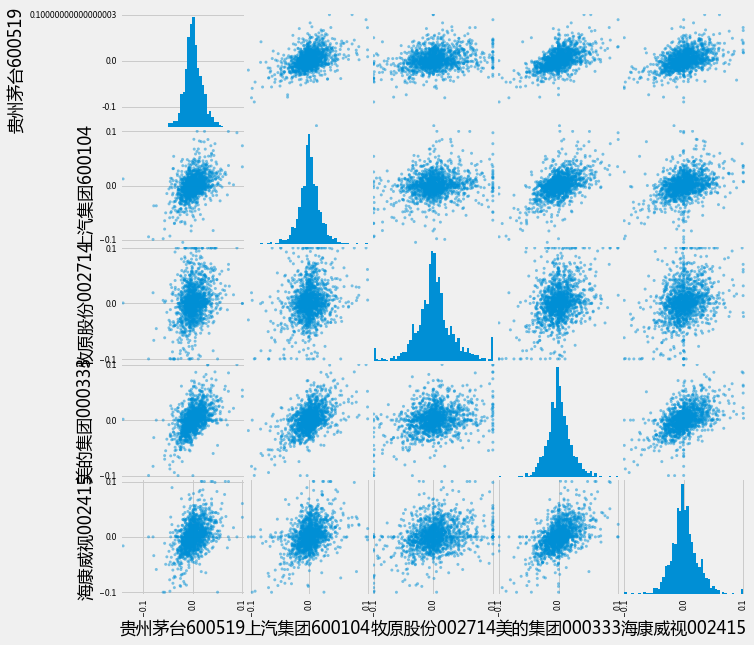

In [24]:
# 绘制散点图
from pandas.plotting import scatter_matrix
box_df = pd.concat([file1['returns'],file2['returns'],file3['returns'],file4['returns'],file5['returns']],axis=1)
box_df.columns = [name1,name2,name3,name4,name5]
scatter_matrix(box_df,figsize=(10,10),alpha=0.5,hist_kwds={'bins':50});

In [26]:
# 协方差矩阵
all_close = pd.concat([file1['Close'],file2['Close'],file3['Close'],file4['Close'],file5['Close']],axis=1)
names=[name1,name2,name3,name4,name5]
all_close.columns=names
returns = np.log(all_close / all_close.shift(1))
print(returns.mean()*252)
returns.cov()*252

贵州茅台600519    0.406398
上汽集团600104    0.005686
牧原股份002714    0.527598
美的集团000333    0.271776
海康威视002415    0.254279
dtype: float64


,贵州茅台600519,上汽集团600104,牧原股份002714,美的集团000333,海康威视002415
贵州茅台600519,0.101007,0.047715,0.044536,0.061238,0.055939
上汽集团600104,0.047715,0.120623,0.039065,0.068584,0.052079
牧原股份002714,0.044536,0.039065,0.271515,0.060588,0.066424
美的集团000333,0.061238,0.068584,0.060588,0.134231,0.077935
海康威视002415,0.055939,0.052079,0.066424,0.077935,0.162235


In [28]:
# 给不同资产随机分配初始权重
weights = np.random.random(5)
weights /= np.sum(weights)
print(weights)

[0.15901387 0.1327629  0.42696275 0.02806718 0.25319329]


In [29]:
# 计算预期组合年化收益
np.sum(returns.mean()*weights)*252

0.36265197276004935

In [31]:
# 计算组合方差
np.dot(weights.T, np.dot(returns.cov()*252,weights))

0.10315819635062061

In [32]:
# 计算组合标准差值
np.sqrt(np.dot(weights.T, np.dot(returns.cov()* 252,weights)))

0.32118249695557916

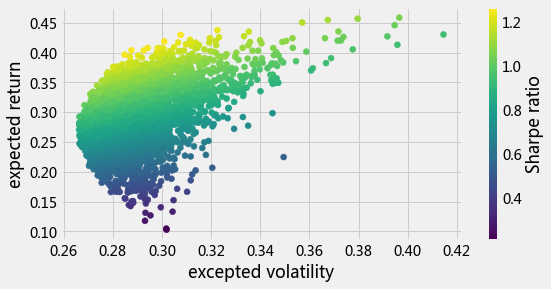

In [34]:
# 蒙特卡洛模拟
port_returns = []

port_variance = []

for p in range(4000):

    weights = np.random.random(5)

    weights /=np.sum(weights)

    port_returns.append(np.sum(returns.mean()*252*weights))

    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))

port_returns = np.array(port_returns)

port_variance = np.array(port_variance)

#无风险利率设定为4%

risk_free = 0.04

plt.figure(figsize = (8,4))

plt.scatter(port_variance, port_returns, c=(port_returns-risk_free)/port_variance, marker = 'o')

plt.grid(True)

plt.xlabel('excepted volatility')

plt.ylabel('expected return')

plt.colorbar(label = 'Sharpe ratio')

In [43]:
import statsmodels.api as sm #统计运算

import scipy.stats as scs #科学计算

import matplotlib.pyplot as plt #绘图

In [46]:
# 建立statistics函数来记录重要的投资组合统计数据
def statistics(weights):

    weights = np.array(weights)

    port_returns = np.sum(returns.mean()*weights)*252

    port_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))

    return np.array([port_returns, port_variance, port_returns/port_variance])

In [47]:
import scipy.optimize as sco

In [50]:
# #最小化夏普指数的负值
def min_sharpe(weights):
    return -statistics(weights)[2]

In [53]:
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数

bnds = tuple((0,1) for x in range(5))

#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。

opts = sco.minimize(min_sharpe, 5*[1./5,], method = 'SLSQP', bounds = bnds, constraints = cons)
print(opts)

     fun: -1.455011403389949
     jac: array([-3.80188227e-04,  6.96214154e-01,  9.36850905e-04,  6.93788081e-02,
        9.40963328e-02])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([7.11330719e-01, 0.00000000e+00, 2.88669281e-01, 6.07153217e-18,
       0.00000000e+00])


In [54]:
# 得到的最优组合权重向量为：
opts['x'].round(3)

array([0.711, 0.   , 0.289, 0.   , 0.   ])

In [55]:
#sharpe最大的组合3个统计数据分别为：

#预期收益率、预期波动率、最优夏普指数

statistics(opts['x']).round(3)

array([0.441, 0.303, 1.455])

In [57]:
#但是我们定义一个函数对 方差进行最小化

def min_variance(weights):

    return statistics(weights)[1]

optv = sco.minimize(min_variance, 5*[1./5,],method = 'SLSQP', bounds = bnds, constraints = cons)

optv

     fun: 0.26582876024679025
     jac: array([0.26592932, 0.26554609, 0.26630259, 0.26590209, 0.26573714])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.40007793, 0.29827654, 0.10582878, 0.07202052, 0.12379624])

In [58]:
# 方差最小的最优组合权重向量及组合的统计数据分别为：
optv['x'].round(3)

array([0.4  , 0.298, 0.106, 0.072, 0.124])

In [59]:
#得到的预期收益率、波动率和夏普指数

statistics(optv['x']).round(3)

array([0.271, 0.266, 1.02 ])

In [62]:
# 在最优化时采用两个约束，1.给定目标收益率，2.投资组合权重和为1。
def min_variance(weights):

    return statistics(weights)[1]

#在不同目标收益率水平（target_returns）循环时，最小化的一个约束条件会变化。

target_returns = np.linspace(0.0,0.5,50)

target_variance = []

for tar in target_returns:

    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})

    res = sco.minimize(min_variance, 5*[1./5,],method = 'SLSQP', bounds = bnds, constraints = cons)

    target_variance.append(res['fun'])

target_variance = np.array(target_variance)



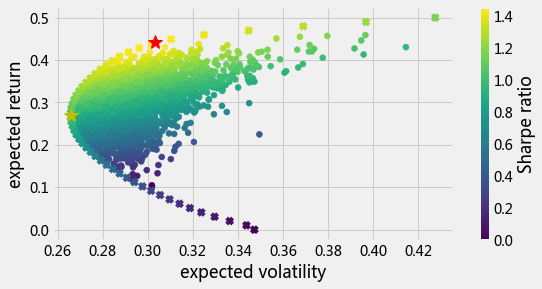

In [63]:
# #
# 下面是最优化结果的展示。

# 叉号：构成的曲线是有效前沿（目标收益率下最优的投资组合）

# 红星：sharpe最大的投资组合

# 黄星：方差最小的投资组合
plt.figure(figsize = (8,4))

#圆圈：蒙特卡洛随机产生的组合分布

plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o')

#叉号：有效前沿

plt.scatter(target_variance,target_returns, c = target_returns/target_variance, marker = 'x')

#红星：标记最高sharpe组合

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)

#黄星：标记最小方差组合

plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)

plt.grid(True)

plt.xlabel('expected volatility')

plt.ylabel('expected return')

plt.colorbar(label = 'Sharpe ratio')

In [13]:
# 时序性分析
t1 = file1['Close']
t1.index = pd.to_datetime(t1.index)
t1.name = "贵州茅台600519"

t2 = file2['Close']
t2.index = pd.to_datetime(t2.index)
t2.name="上汽集团600104"

t3 = file3['Close']
t3.index = pd.to_datetime(t3.index)
t3.name="牧原股份002714"

t4 = file4['Close']
t4.index = pd.to_datetime(t4.index)
t4.name="美的集团000333"

t5 = file5['Close']
t5.index = pd.to_datetime(t5.index)
t5.name="海康威视002415"


In [14]:
import statsmodels.api as stats

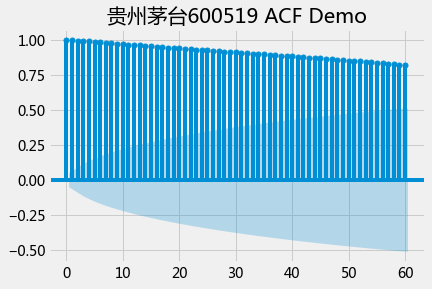

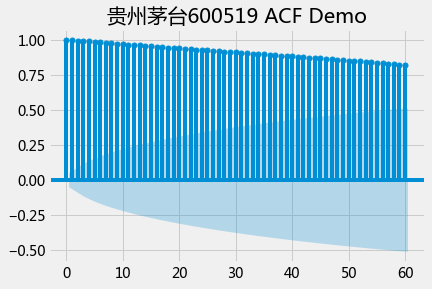

In [32]:
stats.graphics.tsa.plot_acf(t1,use_vlines=True,lags=60, title = '贵州茅台600519 ACF Demo')

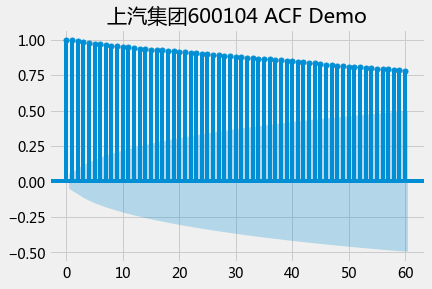

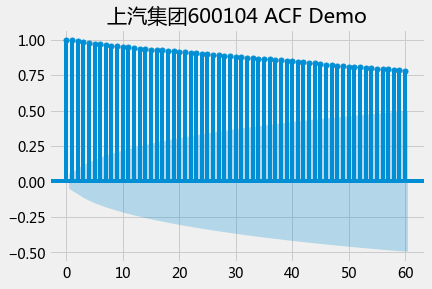

In [31]:
stats.graphics.tsa.plot_acf(t2,use_vlines=True,lags=60, title = '上汽集团600104 ACF Demo')

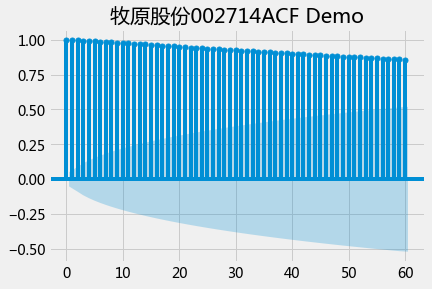

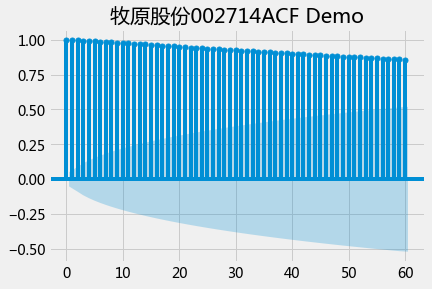

In [30]:
stats.graphics.tsa.plot_acf(t3,use_vlines=True,lags=60, title = '牧原股份002714ACF Demo')

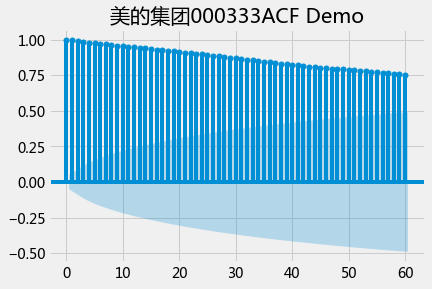

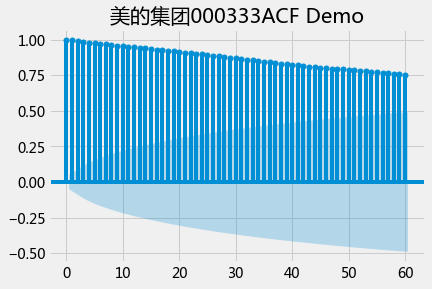

In [29]:
stats.graphics.tsa.plot_acf(t4,use_vlines=True,lags=60, title = '美的集团000333ACF Demo')

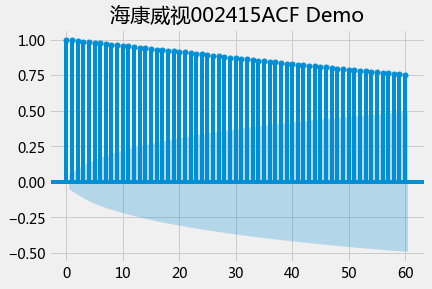

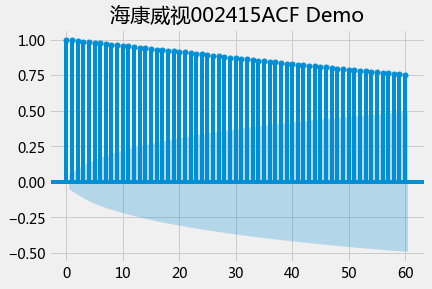

In [28]:
stats.graphics.tsa.plot_acf(t5,use_vlines=True,lags=60, title = '海康威视002415ACF Demo')

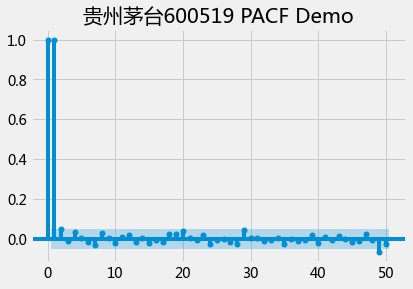

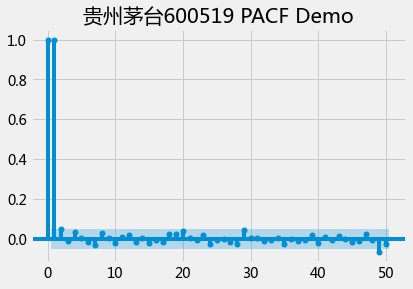

In [34]:
stats.graphics.tsa.plot_pacf(t1,use_vlines=True,lags=50, title = '贵州茅台600519 PACF Demo')

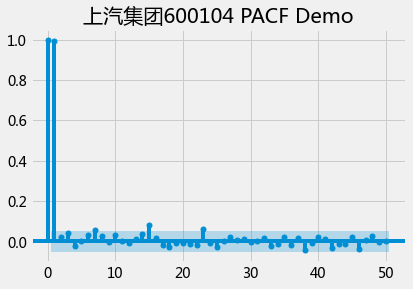

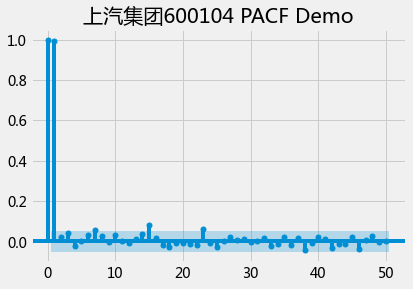

In [35]:
stats.graphics.tsa.plot_pacf(t2,use_vlines=True,lags=50, title = '上汽集团600104 PACF Demo')

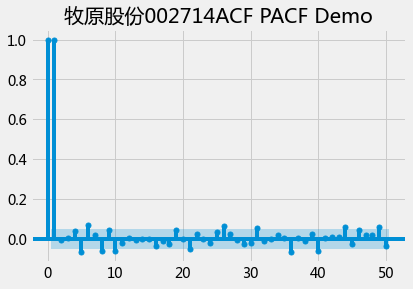

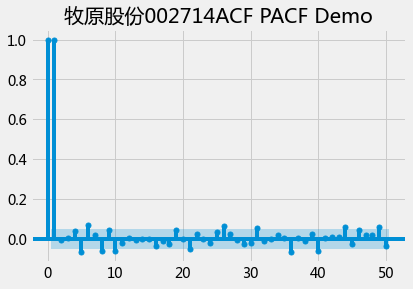

In [36]:
stats.graphics.tsa.plot_pacf(t3,use_vlines=True,lags=50, title = '牧原股份002714ACF PACF Demo')

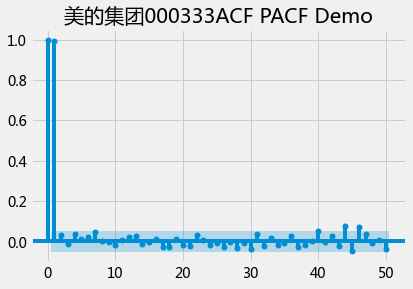

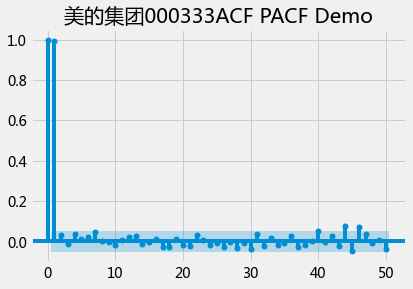

In [37]:
stats.graphics.tsa.plot_pacf(t4,use_vlines=True,lags=50, title = '美的集团000333ACF PACF Demo')

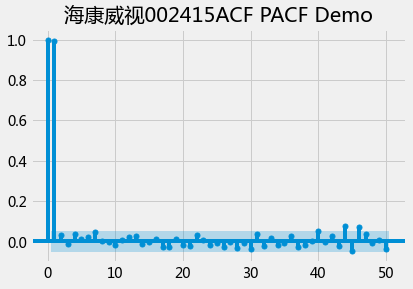

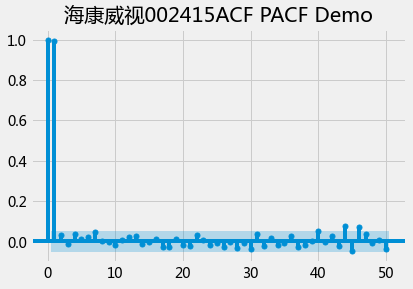

In [38]:
stats.graphics.tsa.plot_pacf(t4,use_vlines=True,lags=50, title = '海康威视002415ACF PACF Demo')